In [88]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CS266Proj").getOrCreate()
import pandas as pd
import json
from pyspark.sql.functions import col, when


In [89]:
review_df = spark.read.json("yelp_academic_dataset_review.json")
review_df.show()


+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [90]:
business_df = spark.read.json("yelp_academic_dataset_business.json")
business_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{NULL, NULL, NULL...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|                NULL|      0|   34.4266787|  -119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{NULL, NULL, NULL...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|{8:0-18:30, 0:0-0...|      1|   

In [91]:
business_df.createOrReplaceTempView("business")
review_df.createOrReplaceTempView("review")

In [92]:
query = "SELECT state, AVG(stars) FROM business GROUP BY state"
result = spark.sql(query)

result.show()

+-----+------------------+
|state|        avg(stars)|
+-----+------------------+
|   AZ|3.5920096852300243|
|   LA| 3.679161628375655|
|   NJ|3.4591143392689783|
|   NV|3.7368762151652626|
|   ID|3.7076337586747257|
|   CA|3.9967326542379396|
|   NC|               2.0|
|   DE|3.3549668874172185|
|   MO| 3.546091817098873|
|   IL|3.3696969696969696|
|   WA|               3.5|
|   IN|3.5882457544234017|
|   TN| 3.571499668214997|
|   PA|3.5730191838773173|
|   AB| 3.447514803516957|
|   FL|3.6109570831750855|
|   CO|               4.0|
|   HI|              4.25|
|   TX|             2.875|
|   UT|               4.5|
+-----+------------------+
only showing top 20 rows



In [93]:
from pyspark.sql.functions import explode, col
#bdf = business_df.select(explode("attributes"), "stars")
business_df.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [94]:
query = "SELECT AVG(stars), attributes.DriveThru, COUNT(*) FROM business WHERE attributes.driveThru IS NOT NULL AND attributes.driveThru != 'None' GROUP BY attributes.DriveThru"
result = spark.sql(query)

result.show()

+-----------------+---------+--------+
|       avg(stars)|DriveThru|count(1)|
+-----------------+---------+--------+
|3.613645001900418|    False|    2631|
|2.611339734796525|     True|    4374|
+-----------------+---------+--------+



In [95]:
query = "SELECT AVG(stars), attributes.RestaurantsTakeOut, COUNT(*) FROM business WHERE attributes.RestaurantsTakeOut IS NOT NULL AND attributes.RestaurantsTakeOut != 'None' GROUP BY attributes.RestaurantsTakeOut"
result = spark.sql(query)

result.show()

+------------------+------------------+--------+
|        avg(stars)|RestaurantsTakeOut|count(1)|
+------------------+------------------+--------+
|  3.41380744437513|             False|    4809|
|3.5336116200441983|              True|   52943|
+------------------+------------------+--------+



In [96]:
query = "SELECT AVG(stars), attributes.RestaurantsDelivery, COUNT(*) FROM business WHERE attributes.RestaurantsDelivery IS NOT NULL AND attributes.RestaurantsDelivery != 'None' GROUP BY attributes.RestaurantsDelivery"
result = spark.sql(query)

result.show()

+-----------------+-------------------+--------+
|       avg(stars)|RestaurantsDelivery|count(1)|
+-----------------+-------------------+--------+
|3.620938181097682|              False|   20188|
|3.412601878927394|               True|   32146|
+-----------------+-------------------+--------+



In [97]:
query = "SELECT AVG(stars), attributes.GoodForKids, COUNT(*) FROM business WHERE attributes.GoodForKids IS NOT NULL AND attributes.GoodForKids != 'None' GROUP BY attributes.GoodForKids"
result = spark.sql(query)

result.show()

+------------------+-----------+--------+
|        avg(stars)|GoodForKids|count(1)|
+------------------+-----------+--------+
|3.6132704935395044|      False|    9442|
|3.5749800706069923|       True|   43905|
+------------------+-----------+--------+



In [98]:
query = "SELECT AVG(stars), attributes.HasTV, COUNT(*) FROM business WHERE attributes.HasTV IS NOT NULL AND attributes.HasTV != 'None' GROUP BY attributes.HasTV"
result = spark.sql(query)

result.show()

+------------------+-----+--------+
|        avg(stars)|HasTV|count(1)|
+------------------+-----+--------+
|3.7416827055265327|False|   10911|
| 3.477733208408971| True|   34154|
+------------------+-----+--------+



In [99]:
query = "SELECT AVG(stars), attributes.RestaurantsReservations, COUNT(*) FROM business WHERE attributes.RestaurantsReservations IS NOT NULL AND attributes.RestaurantsReservations != 'None' GROUP BY attributes.RestaurantsReservations"
result = spark.sql(query)

result.show()

+------------------+-----------------------+--------+
|        avg(stars)|RestaurantsReservations|count(1)|
+------------------+-----------------------+--------+
| 3.424265072247135|                  False|   30105|
|3.6556146492527266|                   True|   14854|
+------------------+-----------------------+--------+



In [100]:
query = "SELECT AVG(stars), attributes.RestaurantsGoodForGroups, COUNT(*) FROM business WHERE attributes.RestaurantsGoodForGroups IS NOT NULL AND attributes.RestaurantsGoodForGroups != 'None' GROUP BY attributes.RestaurantsGoodForGroups"
result = spark.sql(query)

result.show()

+------------------+------------------------+--------+
|        avg(stars)|RestaurantsGoodForGroups|count(1)|
+------------------+------------------------+--------+
|3.3719380103316112|                   False|    6001|
|3.4974834853727588|                    True|   38148|
+------------------+------------------------+--------+



In [101]:

query = "SELECT AVG(stars), attributes.NoiseLevel, COUNT(*) FROM business WHERE attributes.NoiseLevel IS NOT NULL AND attributes.NoiseLevel != 'None' GROUP BY attributes.NoiseLevel"
result = spark.sql(query)

result.show()

+------------------+------------+--------+
|        avg(stars)|  NoiseLevel|count(1)|
+------------------+------------+--------+
| 3.469068808335142|   'average'|    4607|
|3.3093583980384143|     u'loud'|    2447|
| 3.645046439628483|    u'quiet'|    6460|
|3.6015244891339604|  u'average'|   21581|
| 2.808270676691729| 'very_loud'|     133|
|  3.54855195911414|     'quiet'|    1174|
| 3.020618556701031|u'very_loud'|    1067|
|3.2350515463917526|      'loud'|     485|
+------------------+------------+--------+



In [102]:
query = "SELECT AVG(stars), attributes.RestaurantsPriceRange2, COUNT(*) FROM business WHERE attributes.RestaurantsPriceRange2 IS NOT NULL AND attributes.RestaurantsPriceRange2 != 'None' GROUP BY attributes.RestaurantsPriceRange2"
result = spark.sql(query)

result.show()

+------------------+----------------------+--------+
|        avg(stars)|RestaurantsPriceRange2|count(1)|
+------------------+----------------------+--------+
|3.5584970751462426|                     3|    6667|
| 3.406362690707351|                     1|   28840|
|3.2743288590604025|                     4|    1192|
|3.6336839505156338|                     2|   48581|
+------------------+----------------------+--------+



In [103]:
query = "SELECT COUNT(*) FROM business WHERE attributes.HasTV IS NOT NULL AND attributes.HasTV != 'None' AND attributes.GoodForKids IS NOT NULL AND attributes.GoodForKids != 'None' AND attributes.RestaurantsDelivery IS NOT NULL AND attributes.RestaurantsDelivery != 'None' AND attributes.RestaurantsTakeOut IS NOT NULL AND attributes.RestaurantsTakeOut != 'None' AND attributes.RestaurantsReservations IS NOT NULL AND attributes.RestaurantsReservations != 'None' AND attributes.RestaurantsGoodForGroups IS NOT NULL AND attributes.RestaurantsGoodForGroups != 'None' AND attributes.NoiseLevel IS NOT NULL AND attributes.NoiseLevel != 'None' AND attributes.RestaurantsPriceRange2 IS NOT NULL AND attributes.RestaurantsPriceRange2 != 'None'"
result = spark.sql(query)

result.show()

+--------+
|count(1)|
+--------+
|   29558|
+--------+



In [104]:
model_df = business_df[['business_id', 'state','stars', 'attributes.RestaurantsDelivery', 'attributes.RestaurantsTakeOut', 'attributes.HasTV', 'attributes.GoodForKids', 'attributes.RestaurantsReservations', 'attributes.RestaurantsGoodForGroups', 'attributes.NoiseLevel']]

In [105]:
model_df.show()
model_df.count()

+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|         business_id|state|stars|RestaurantsDelivery|RestaurantsTakeOut|HasTV|GoodForKids|RestaurantsReservations|RestaurantsGoodForGroups|NoiseLevel|
+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|Pns2l4eNsfO8kk83d...|   CA|  5.0|               NULL|              NULL| NULL|       NULL|                   NULL|                    NULL|      NULL|
|mpf3x-BjTdTEA3yCZ...|   MO|  3.0|               NULL|              NULL| NULL|       NULL|                   NULL|                    NULL|      NULL|
|tUFrWirKiKi_TAnsV...|   AZ|  3.5|              False|             False|False|       NULL|                  False|                    NULL|      NULL|
|MTSW4McQd7CbVtyjq...|   PA|  4.0|              False|              True| NULL|       NU

150346

In [106]:
updated = model_df.dropna()
updated.show()
updated.count()


+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|         business_id|state|stars|RestaurantsDelivery|RestaurantsTakeOut|HasTV|GoodForKids|RestaurantsReservations|RestaurantsGoodForGroups|NoiseLevel|
+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|k0hlBqXX-Bt0vf1op...|   MO|  3.0|              False|              True| True|       True|                  False|                    True|u'average'|
|0bPLkL0QhhPO5kt1_...|   FL|  4.5|               True|              True| True|       True|                  False|                   False|u'average'|
|MUTTqe8uqyMdBl186...|   PA|  4.0|               True|              True|False|      False|                   True|                    True|u'average'|
|ROeacJQwBeh05Rqg7...|   PA|  4.5|               None|              True| True|       Tr

31544

In [107]:
updated = updated.withColumn("RestaurantsDelivery", when(col("RestaurantsDelivery") == "None", "False").otherwise(col("RestaurantsDelivery")))
updated = updated.withColumn("RestaurantsTakeOut", when(col("RestaurantsTakeOut") == "None", "False").otherwise(col("RestaurantsTakeOut")))
updated = updated.withColumn("HasTV", when(col("HasTV") == "None", "False").otherwise(col("HasTV")))
updated = updated.withColumn("GoodForKids", when(col("GoodForKids") == "None", "False").otherwise(col("GoodForKids")))
updated = updated.withColumn("RestaurantsReservations", when(col("RestaurantsReservations") == "None", "False").otherwise(col("RestaurantsReservations")))
updated = updated.withColumn("RestaurantsGoodForGroups", when(col("RestaurantsGoodForGroups") == "None", "False").otherwise(col("RestaurantsGoodForGroups")))
updated.show()
updated.count()

+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|         business_id|state|stars|RestaurantsDelivery|RestaurantsTakeOut|HasTV|GoodForKids|RestaurantsReservations|RestaurantsGoodForGroups|NoiseLevel|
+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|k0hlBqXX-Bt0vf1op...|   MO|  3.0|              False|              True| True|       True|                  False|                    True|u'average'|
|0bPLkL0QhhPO5kt1_...|   FL|  4.5|               True|              True| True|       True|                  False|                   False|u'average'|
|MUTTqe8uqyMdBl186...|   PA|  4.0|               True|              True|False|      False|                   True|                    True|u'average'|
|ROeacJQwBeh05Rqg7...|   PA|  4.5|              False|              True| True|       Tr

31544

In [108]:
query = """SELECT B.state, 
SUM(CASE WHEN R.stars=1.0 THEN 1 ELSE 0 END) AS `1.0`,  
SUM(CASE WHEN R.stars=2.0 THEN 1 ELSE 0 END) AS `2.0`, 
SUM(CASE WHEN R.stars=3.0 THEN 1 ELSE 0 END) AS `3.0`,
SUM(CASE WHEN R.stars=4.0 THEN 1 ELSE 0 END) AS `4.0`,
SUM(CASE WHEN R.stars=5.0 THEN 1 ELSE 0 END) AS `5.0` 
FROM review R, business B WHERE R.business_id = B.business_id GROUP BY B.state"""

review_stars_result = spark.sql(query)

review_stars_result.show()

+-----+------+------+------+------+------+
|state|   1.0|   2.0|   3.0|   4.0|   5.0|
+-----+------+------+------+------+------+
|   AZ| 75214| 34873| 38827| 80514|202280|
|   LA| 88302| 54395| 80378|174793|363805|
|   NJ| 51506| 22838| 25853| 50209|110491|
|   NV| 76978| 31736| 35902| 74156|211906|
|   ID| 26137| 12462| 13181| 27080| 78712|
|   CA| 42849| 23353| 28904| 63544|190206|
|   NC|    17|     7|     1|     1|     3|
|   DE| 14074|  6407|  7465| 14526| 27830|
|   MO| 75066| 40438| 51967|110466|224448|
|   IL| 10556|  4819|  5307|  9828| 21322|
|   IN| 68970| 35909| 48962|111422|224489|
|   TN| 92871| 48354| 60723|123592|288848|
|   PA|241130|134393|175010|362806|685621|
|   AB| 16212|  9850| 15315| 31586| 36473|
|   FL|189588| 84401|104125|218377|565054|
|   CO|     1|     1|     8|     9|    12|
|   HI|     7|     0|     0|     1|    26|
|   WA|     6|     0|     0|     1|    12|
|   UT|     1|     0|     1|     0|    17|
|   TX|    19|     3|     1|     0|    12|
+-----+----

In [109]:
query = """SELECT B.state, 
SUM(R.cool) as cool, 
SUM(R.funny) AS funny, 
SUM(R.useful) AS useful 
FROM review R, business B 
WHERE R.business_id = B.business_id GROUP BY B.state"""
review_attribute_result = spark.sql(query)

review_attribute_result.show()

+-----+------+------+-------+
|state|  cool| funny| useful|
+-----+------+------+-------+
|   AZ|179079|134801| 548819|
|   LA|408085|276782| 840927|
|   NJ|103538| 82927| 312179|
|   NV|347008|177504| 685769|
|   ID| 74151| 42618| 181513|
|   CA|194170|140784| 405032|
|   NC|     3|     4|     14|
|   DE| 20413| 17279|  73554|
|   MO|248152|167828| 571703|
|   IL| 14103| 11920|  45363|
|   IN|233535| 98916| 528504|
|   TN|237123|166379| 561534|
|   PA|790843|593209|2071411|
|   AB| 61842| 40713| 165715|
|   FL|573347|330989|1288344|
|   CO|    10|     5|     17|
|   HI|    17|     9|     48|
|   WA|     8|     0|     20|
|   UT|     5|     4|     15|
|   TX|     9|    22|     62|
+-----+------+------+-------+
only showing top 20 rows



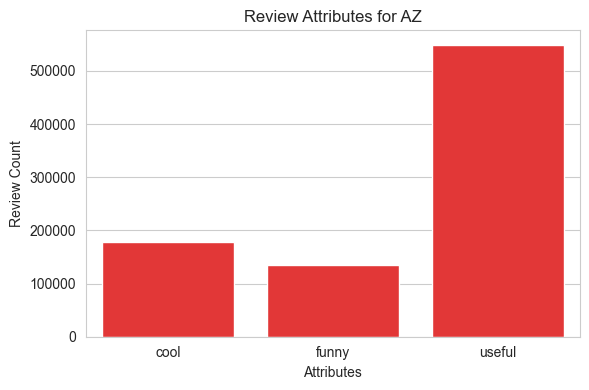

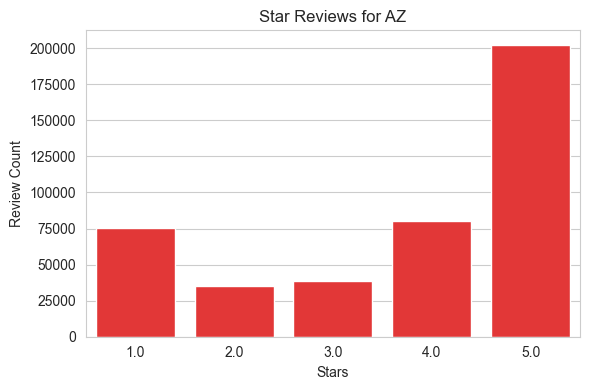

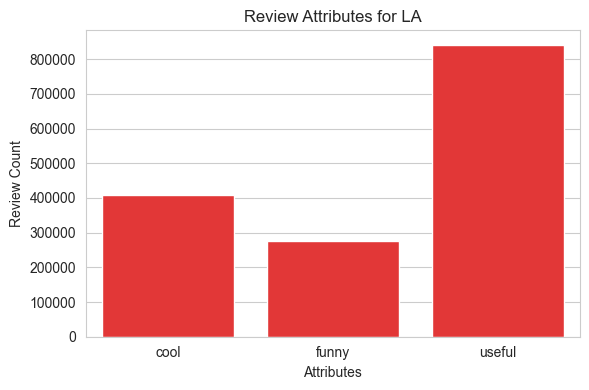

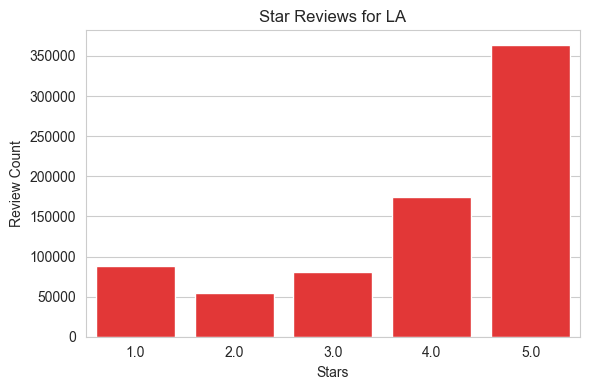

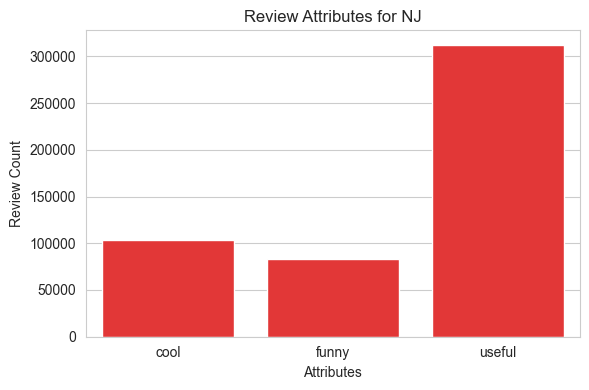

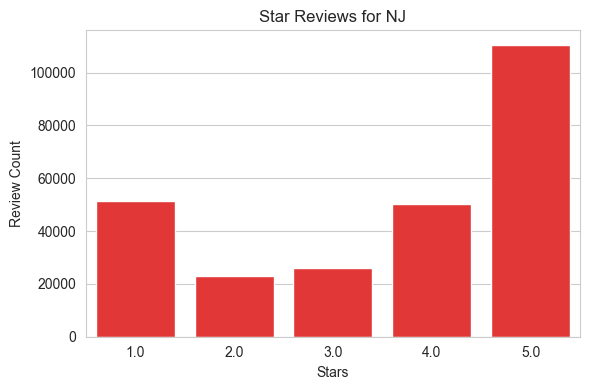

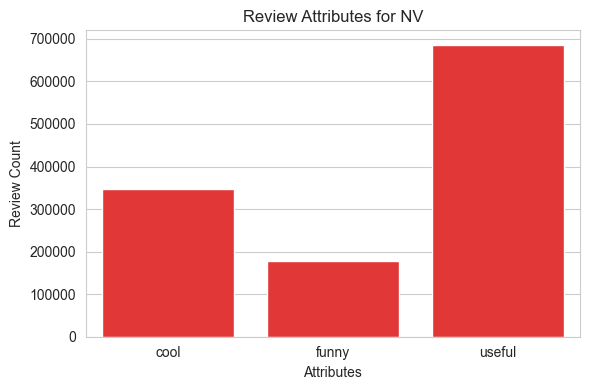

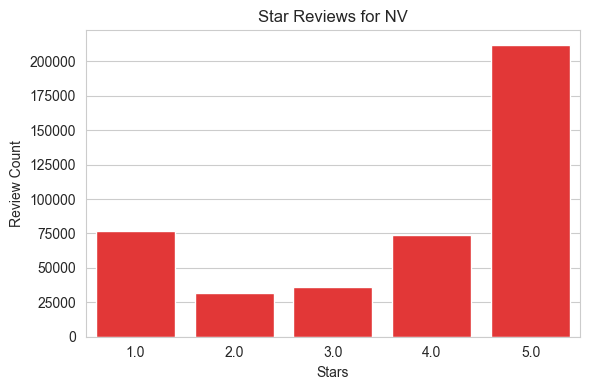

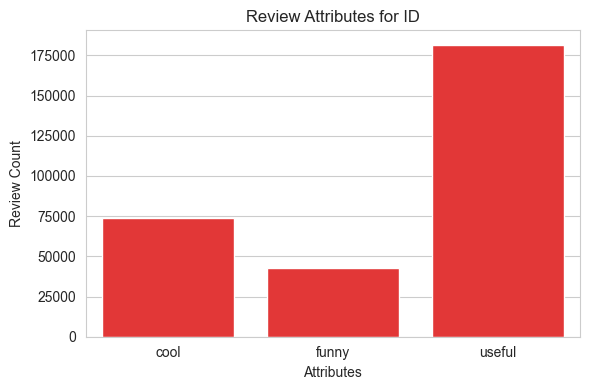

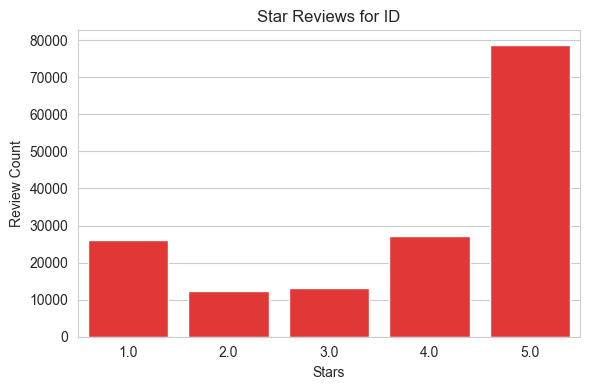

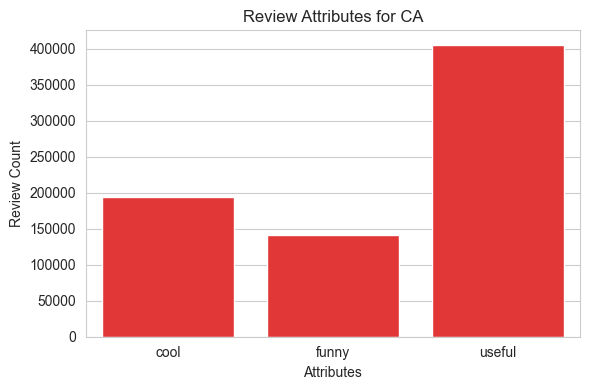

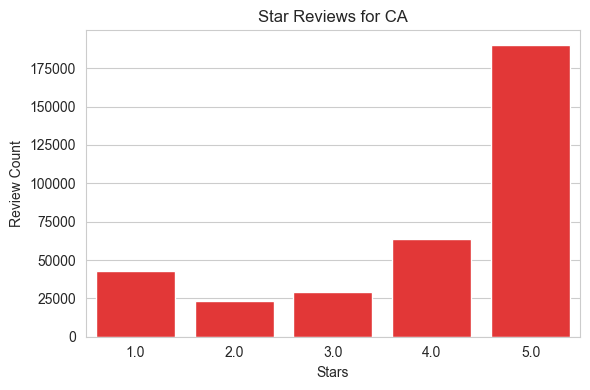

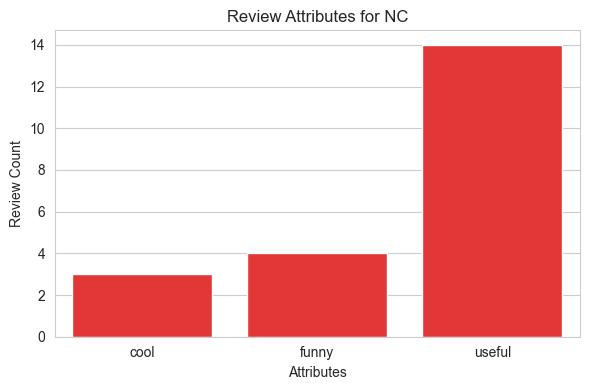

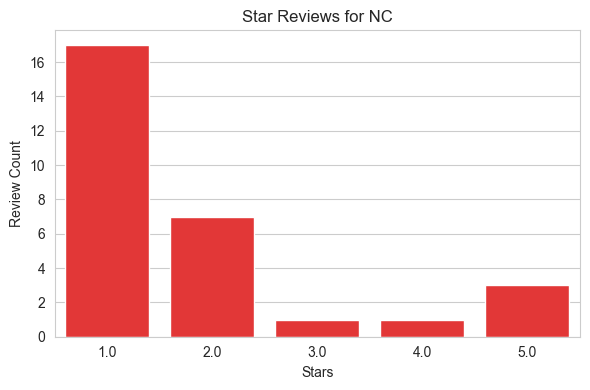

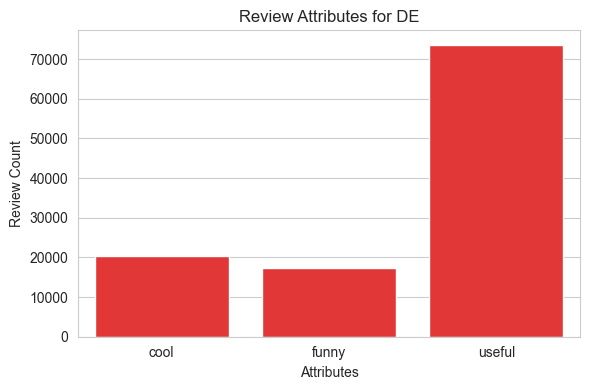

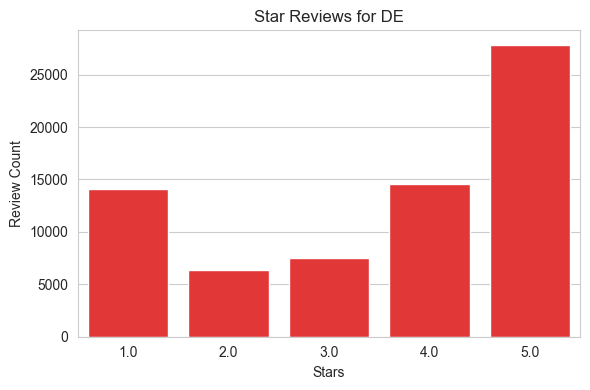

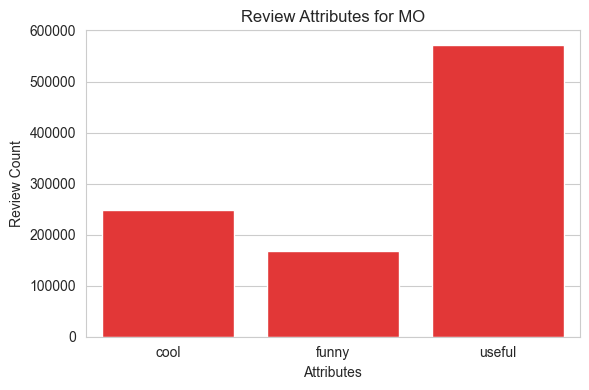

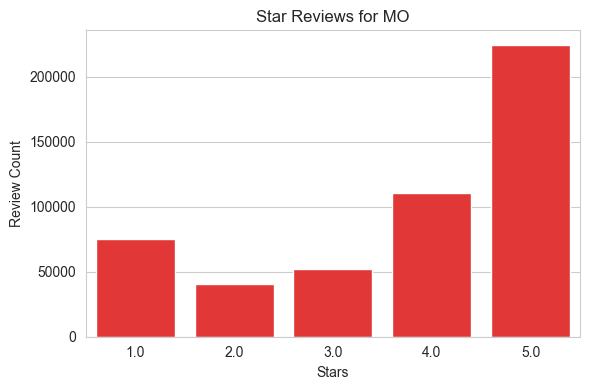

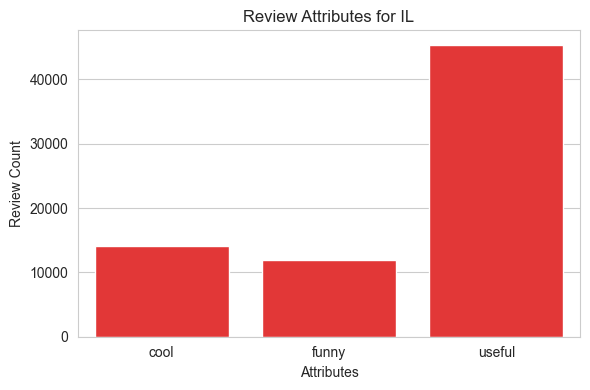

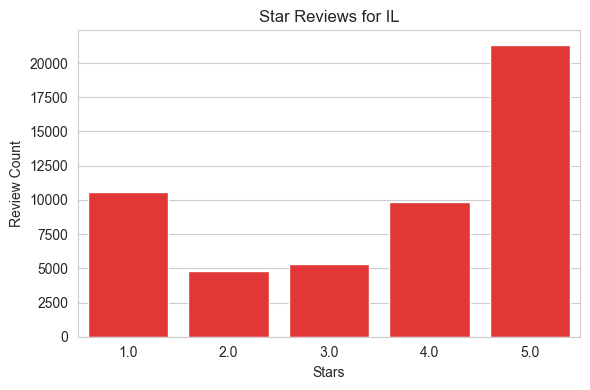

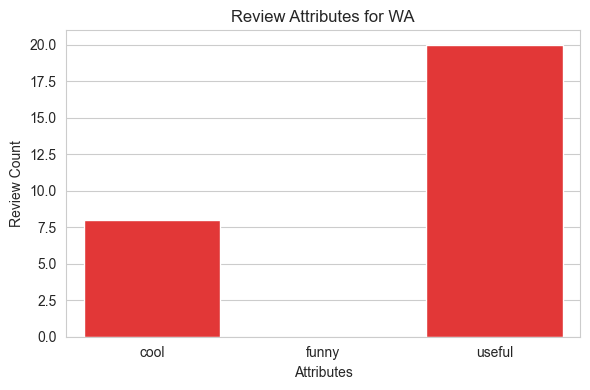

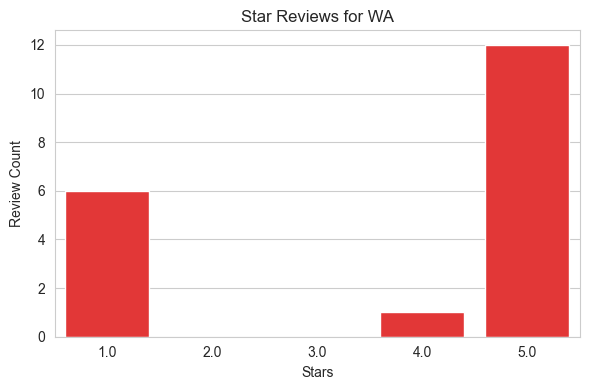

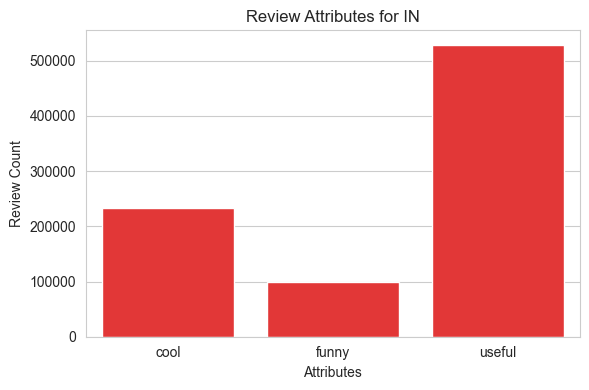

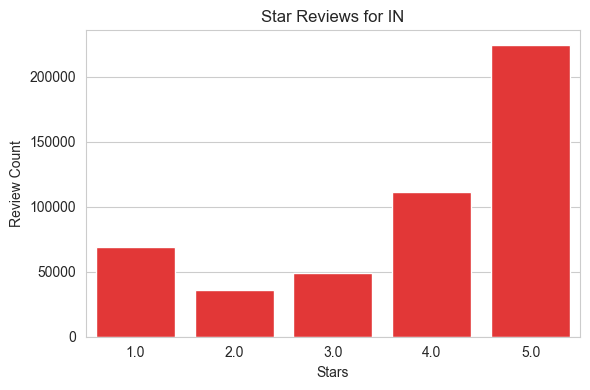

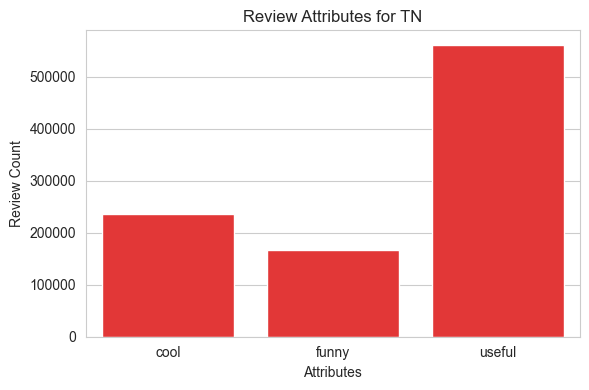

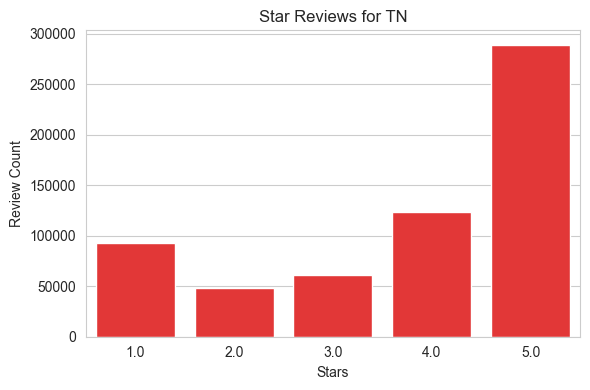

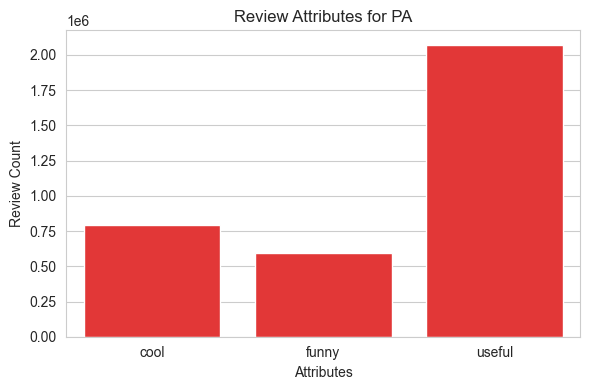

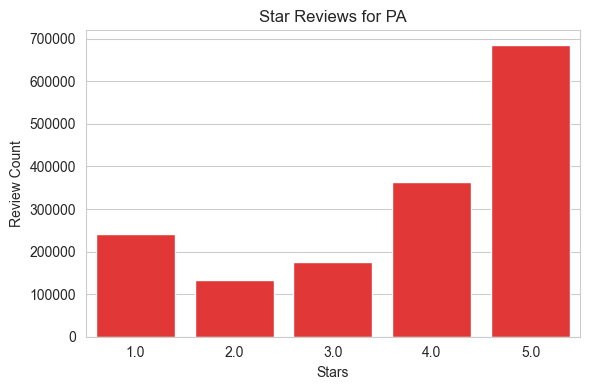

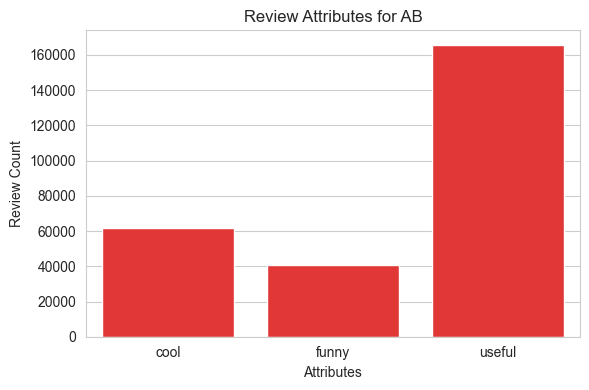

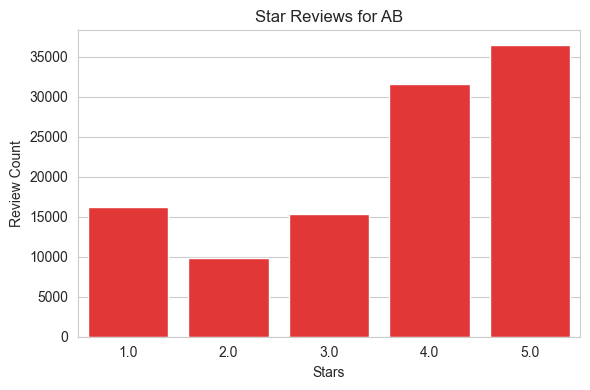

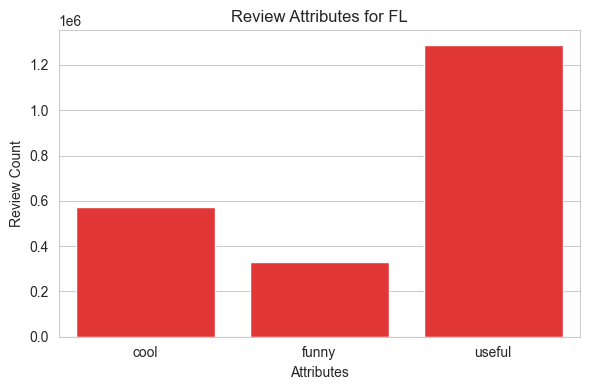

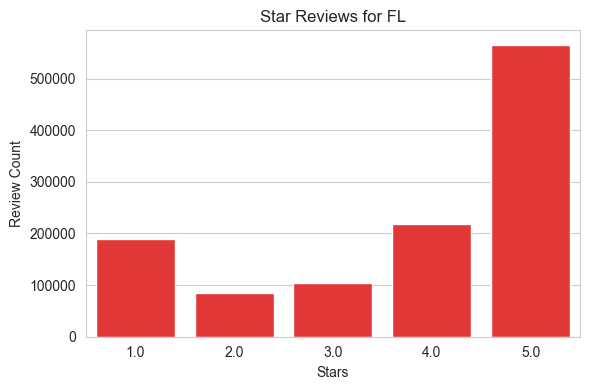

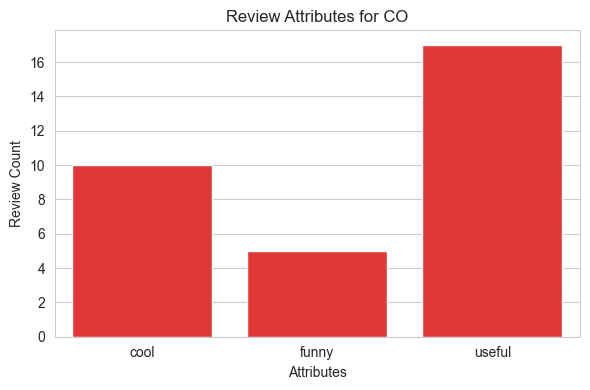

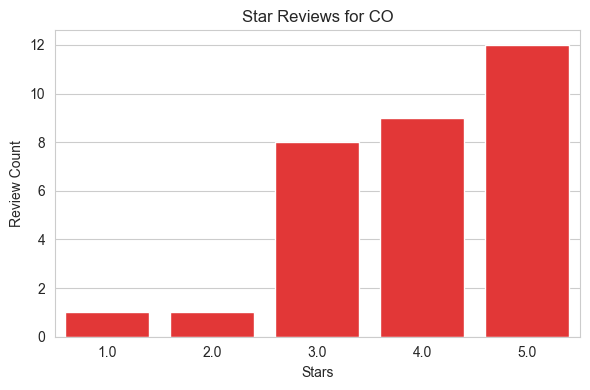

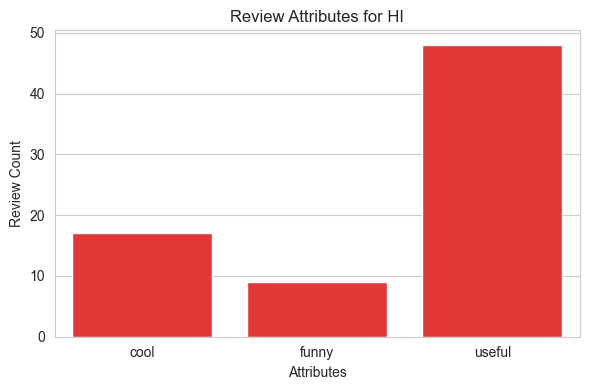

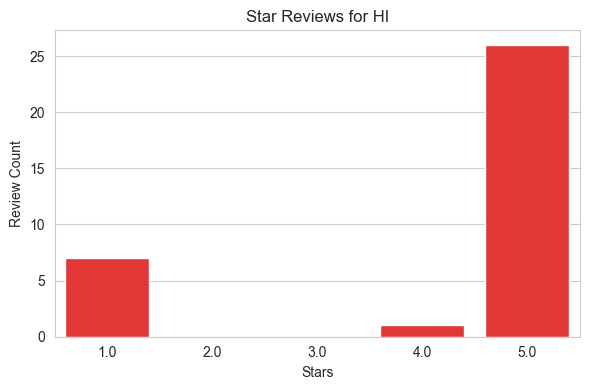

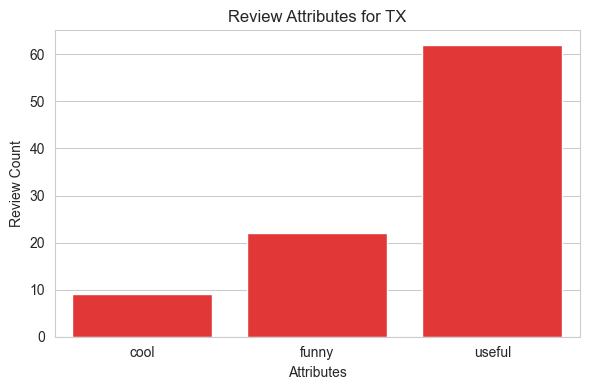

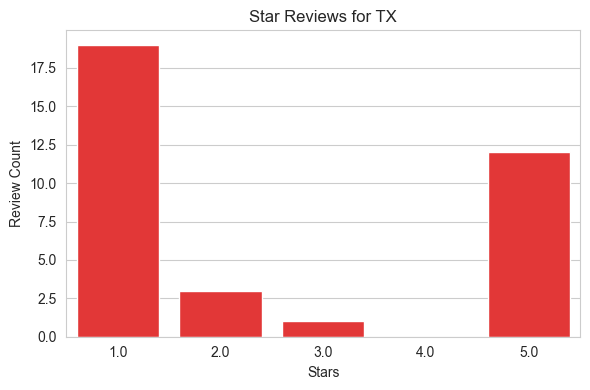

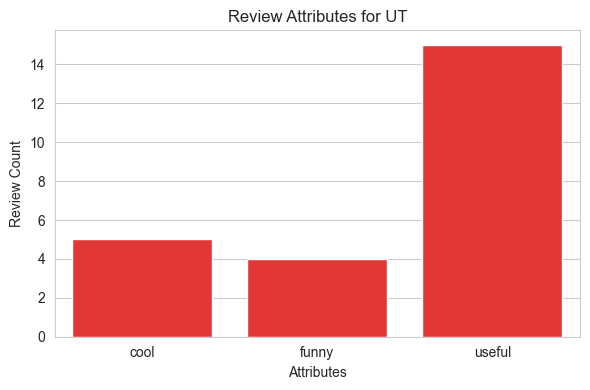

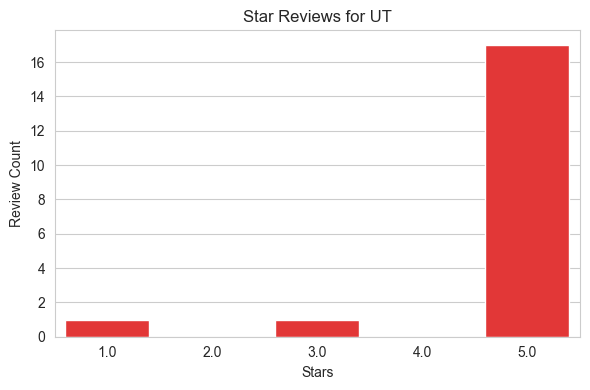

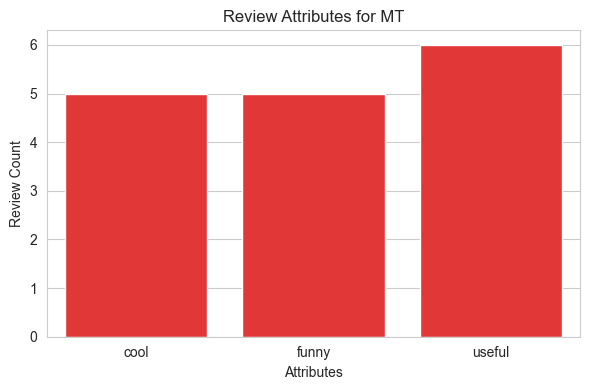

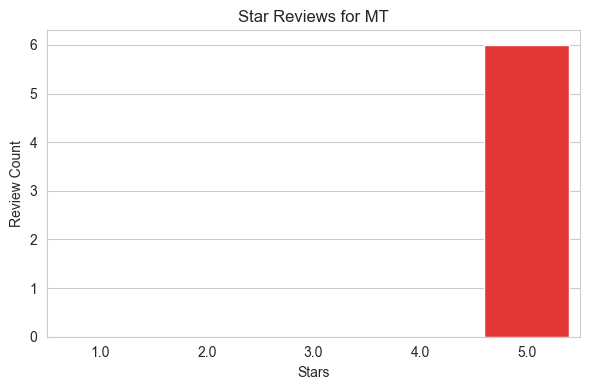

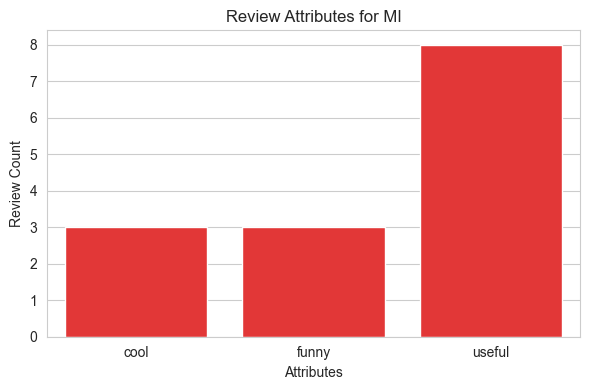

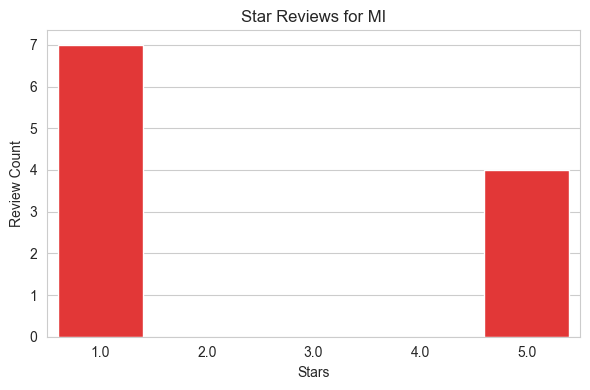

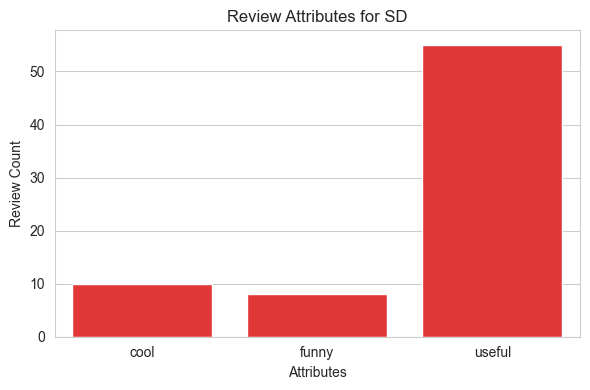

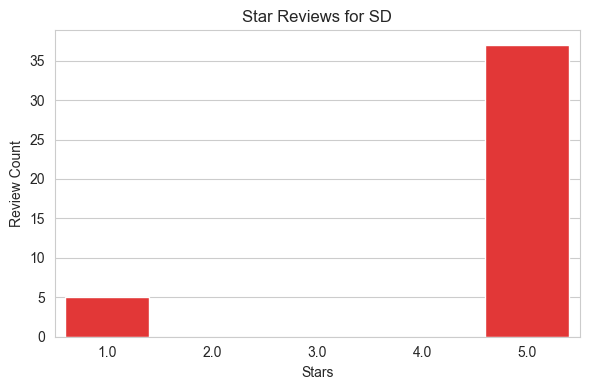

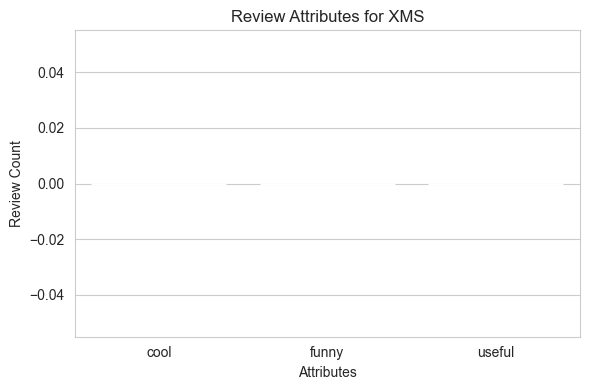

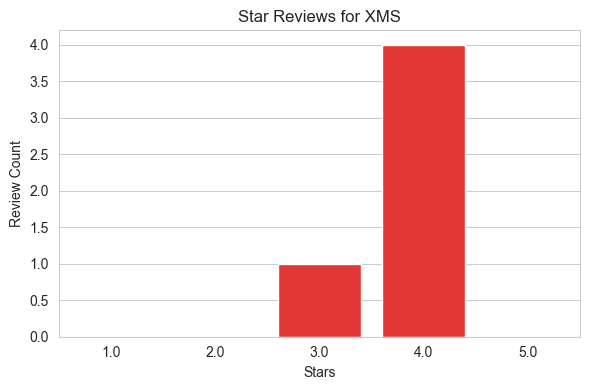

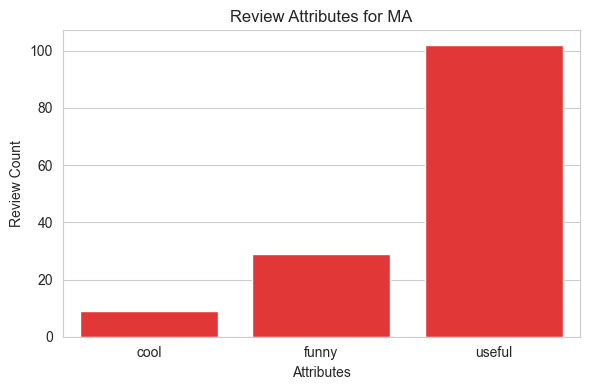

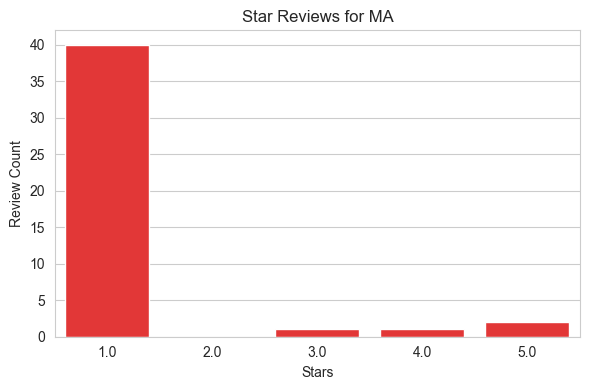

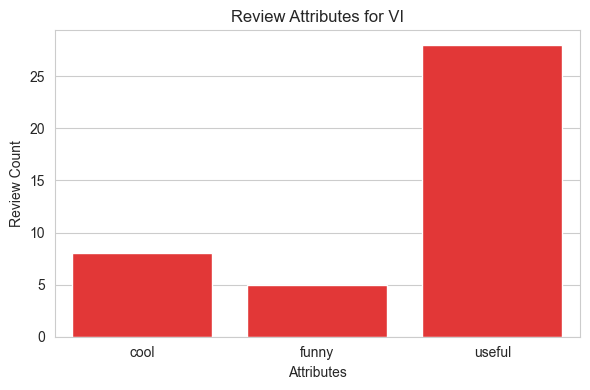

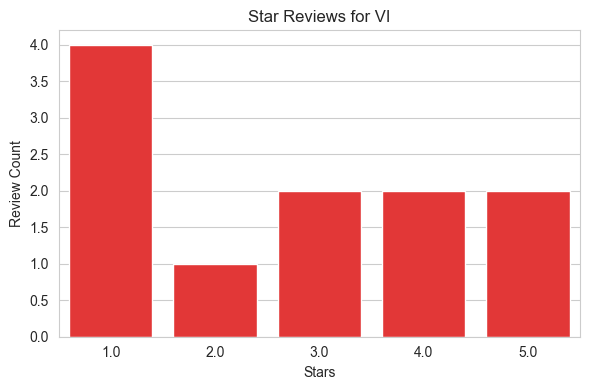

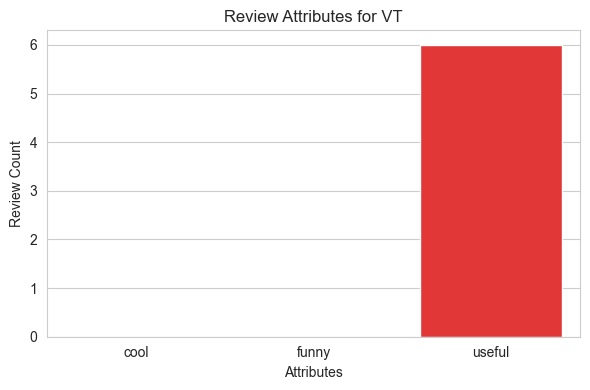

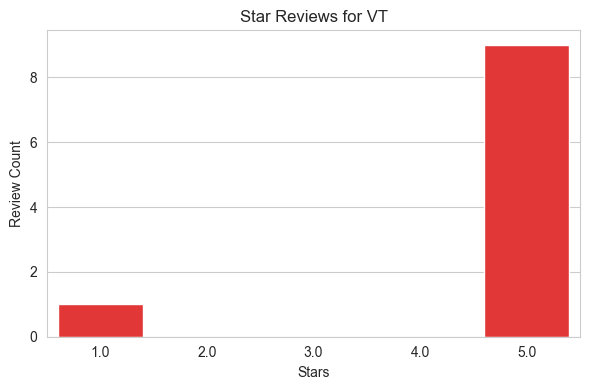

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

states = business_df.select("state").distinct().collect()
states_list = [row['state'] for row in states]

for state in states_list:
    single_review_attribute_result = review_attribute_result.filter(review_attribute_result.state == state)
    single_review_stars_result = review_stars_result.filter(review_stars_result.state == state)


    single_review_attribute_df = single_review_attribute_result.toPandas()
    single_review_stars_df = single_review_stars_result.toPandas()

    columns = ["cool", "funny", "useful"]
    values = single_review_attribute_df[columns].iloc[0] 
    plt.figure(figsize=(6, 4))
    sns.set_style("whitegrid")
    sns.barplot(x=columns, y=values, color='#FF1A1A')
    sns.set_style("whitegrid")
    plt.xlabel("Attributes")
    plt.ylabel("Review Count")
    plt.title(f"Review Attributes for {state}")
    plt.tight_layout()  # Ensure labels don't overlap

    plt.show()

    columns = ["1.0", "2.0", "3.0","4.0", "5.0"]
    values = single_review_stars_df[columns].iloc[0] 
    plt.figure(figsize=(6, 4))

    sns.set_style("whitegrid")
    sns.barplot(x=columns, y=values, color='#FF1A1A')
    
    plt.xlabel("Stars")
    plt.ylabel("Review Count")
    plt.title(f"Star Reviews for {state}")
    plt.tight_layout()  # Ensure labels don't overlap

    plt.show()

In [111]:
query = "SELECT AVG(stars), attributes.RestaurantsGoodForGroups, COUNT(*) FROM business WHERE attributes.RestaurantsGoodForGroups IS NOT NULL AND attributes.RestaurantsGoodForGroups != 'None' GROUP BY attributes.RestaurantsGoodForGroups"
result = spark.sql(query)

result.show()

+------------------+------------------------+--------+
|        avg(stars)|RestaurantsGoodForGroups|count(1)|
+------------------+------------------------+--------+
|3.3719380103316112|                   False|    6001|
|3.4974834853727588|                    True|   38148|
+------------------+------------------------+--------+



In [112]:
four_and_up = updated[updated['stars']>=4.0]
four_and_up.show()
four_and_up.count()


+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|         business_id|state|stars|RestaurantsDelivery|RestaurantsTakeOut|HasTV|GoodForKids|RestaurantsReservations|RestaurantsGoodForGroups|NoiseLevel|
+--------------------+-----+-----+-------------------+------------------+-----+-----------+-----------------------+------------------------+----------+
|0bPLkL0QhhPO5kt1_...|   FL|  4.5|               True|              True| True|       True|                  False|                   False|u'average'|
|MUTTqe8uqyMdBl186...|   PA|  4.0|               True|              True|False|      False|                   True|                    True|u'average'|
|ROeacJQwBeh05Rqg7...|   PA|  4.5|              False|              True| True|       True|                  False|                   False|  u'quiet'|
|WKMJwqnfZKsAae75R...|   AB|  4.0|              False|              True|False|      Fal

13599

In [113]:
updated

DataFrame[business_id: string, state: string, stars: double, RestaurantsDelivery: string, RestaurantsTakeOut: string, HasTV: string, GoodForKids: string, RestaurantsReservations: string, RestaurantsGoodForGroups: string, NoiseLevel: string]

In [114]:
updated.createOrReplaceTempView("updated")

In [115]:
query = "SELECT AVG(stars), attributes.NoiseLevel, COUNT(*) FROM business WHERE attributes.NoiseLevel IS NOT NULL AND attributes.NoiseLevel != 'None' AND stars >= 4.0 GROUP BY attributes.NoiseLevel"
result = spark.sql(query)

result.show()

+------------------+------------+--------+
|        avg(stars)|  NoiseLevel|count(1)|
+------------------+------------+--------+
| 4.201114488348531|   'average'|    1974|
| 4.161548731642189|     u'loud'|     749|
| 4.255226209048362|    u'quiet'|    3205|
|4.1921763730367765|  u'average'|   10251|
|4.2495527728085865|     'quiet'|     559|
|  4.13903743315508|u'very_loud'|     187|
| 4.175862068965517|      'loud'|     145|
|             4.325| 'very_loud'|      20|
+------------------+------------+--------+



In [116]:
query="""
WITH AttributeCounts AS (
    SELECT 
        state, 
        'RestaurantsDelivery' AS attribute, SUM (CASE WHEN RestaurantsDelivery = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
    UNION ALL
    SELECT 
        state, 
        'RestaurantsTakeOut' AS attribute, SUM (CASE WHEN RestaurantsTakeOut = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
    UNION ALL
    SELECT 
        state, 
        'HasTV' AS attribute, SUM (CASE WHEN HasTV = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
    UNION ALL
    SELECT 
        state, 
        'GoodForKids' AS attribute, SUM (CASE WHEN GoodForKids = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
    UNION ALL
    SELECT 
        state, 
        'RestaurantsReservations' AS attribute, SUM (CASE WHEN RestaurantsReservations = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
    UNION ALL
    SELECT 
        state, 
        'RestaurantsGoodForGroups' AS attribute, SUM (CASE WHEN RestaurantsGoodForGroups = 'True' THEN 1 ELSE 0 END) AS count FROM updated GROUP BY state
)
SELECT AC1.state, AC1.attribute FROM AttributeCounts AC1 WHERE AC1.count = (SELECT MAX(AC2.count) FROM AttributeCounts AC2 WHERE AC2.state = AC1.state)
"""

result = spark.sql(query)

result.show()


+-----+--------------------+
|state|           attribute|
+-----+--------------------+
|   AZ|  RestaurantsTakeOut|
|   LA|  RestaurantsTakeOut|
|   NJ|  RestaurantsTakeOut|
|   ID|  RestaurantsTakeOut|
|   CA|  RestaurantsTakeOut|
|   DE|  RestaurantsTakeOut|
|   MO|  RestaurantsTakeOut|
|   IL|  RestaurantsTakeOut|
|   IN|  RestaurantsTakeOut|
|   TN|  RestaurantsTakeOut|
|   PA|  RestaurantsTakeOut|
|   AB|  RestaurantsTakeOut|
|   FL|  RestaurantsTakeOut|
|   NC|         GoodForKids|
|   CO|         GoodForKids|
|   NV|RestaurantsGoodFo...|
|   NC|RestaurantsGoodFo...|
|   CO|RestaurantsGoodFo...|
+-----+--------------------+



In [117]:
query = "SELECT state, RestaurantsDelivery, COUNT(*) FROM updated WHERE RestaurantsDelivery IS NOT NULL AND RestaurantsDelivery != 'None' AND stars >= 4.0 GROUP BY state, RestaurantsDelivery ORDER BY state, RestaurantsDelivery"
result = spark.sql(query)

result.show()

+-----+-------------------+--------+
|state|RestaurantsDelivery|count(1)|
+-----+-------------------+--------+
|   AB|              False|     316|
|   AB|               True|     264|
|   AZ|              False|     290|
|   AZ|               True|     327|
|   CA|              False|     226|
|   CA|               True|     203|
|   DE|              False|     125|
|   DE|               True|      89|
|   FL|              False|    1167|
|   FL|               True|    1191|
|   ID|              False|     195|
|   ID|               True|     133|
|   IL|              False|     137|
|   IL|               True|      63|
|   IN|              False|     475|
|   IN|               True|     618|
|   LA|              False|     689|
|   LA|               True|     456|
|   MO|              False|     593|
|   MO|               True|     466|
+-----+-------------------+--------+
only showing top 20 rows

